This notebook contains 
1. Logistic Regression implementation
2. Random Forest implementation 
3. Neural Networks implementation

# Implementation Notebook
In this notebook we go through various models we applied to solve this problem !

In [1]:
#import packages:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
#load the data:
path = './'
filename = 'DATA.csv'

try:
    heart_data = pd.read_csv(path+filename,sep="\t")
    heart_data = heart_data.drop(['Unnamed: 0'], axis=1)
    print("File Loaded Succesfully ")
except:
    print("File Not Found !!")

File Loaded Succesfully 


# First Model :  Logistic Regression

In [3]:
from statsmodels.tools import add_constant as add_constant
from sklearn.model_selection import train_test_split, cross_val_score

'''
    making our dataFrame constant to prevent any unwanted changes
'''
heart_data_constant = add_constant(heart_data)
heart_data_constant.head()


y = heart_data_constant['target'] 
exclude_col = ['target']

#including all our independent variables in input
X = heart_data_constant[[i for i in heart_data_constant.columns.values.tolist() if i not in exclude_col]]

#spliting data to 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [4]:
model = sm.Logit(y_train,X_train)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.336815
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      228
Method:                           MLE   Df Model:                           13
Date:                Sun, 25 Nov 2018   Pseudo R-squ.:                  0.5062
Time:                        22:31:41   Log-Likelihood:                -81.509
converged:                       True   LL-Null:                       -165.05
                                        LLR p-value:                 7.204e-29
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6717      2.833     -0.943      0.346      -8.225       2.881
age        -1.593e-05      0.026     -0.001      1.000      -0.051       0.051
sex            2.1104      0.543      3.887      0.000       1.046       3.175
cp            -0.8266      0.209     -3.961      0.000      -1.236      -0.418
trestbps       0.0236      0.012      2.049      0.041       0.001       0.046
chol           0.0083      0.004      1.921      0.055      -0.000       0.017
fbs           -0.0833      0.584     -0.143      0.886      -1.227       1.061
restecg       -0.1831      0.403     -0.454      0.650      -0.974       0.608
thalach       -0.0307      0.012     -2.475      0.013      -0.055      -0.006
exang          0.9188      0.464      1.979      0.048       0.009       1.829
oldpeak        0.2698      0.256      1.054      0.292      -0.232       0.772
slope         -0.8093      0.391     -2.068      0.039      -1.576      -0.042
ca             1.0547      0.252      4.192      0.000       0.562       1.548
thal           0.5191      0.322      1.614      0.106      -0.111       1.149
==============================================================================
"""

In [5]:
predictions = result.predict(X_test)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
print (classification_report(y_test, predictions_nominal, digits=3))

             precision    recall  f1-score   support

          0      0.700     0.808     0.750        26
          1      0.839     0.743     0.788        35

avg / total      0.780     0.770     0.772        61



The overall precision is 78 % 

The results above show some of the attributes with P-value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease. Backward elemination approach is used here to remove those attributes with highest Pvalue one at a time follwed by running the regression repeatedly until all attributes have P Values less than 0.05.


**Feature Selection: Backward elemination (P-value approach)**

In [6]:
def back_feature_elem (data_frame,dep_var,col_list): 
    '''
        Takes in the dataframe, the dependent variable and a list of column names, 
        runs the regression repeatedly eleminating feature with the highest
        P-value above alpha one at a time and returns the regression summary with all p-values below alpha
    '''
    

    while len(col_list)>0 :
        model = sm.Logit(dep_var,data_frame[col_list])
        result = model.fit(disp=0)
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)

In [7]:
'''
    this cell is for implementing backward elemination 
'''
cols = heart_data_constant.columns[:-1]

result = back_feature_elem(X_train,y_train,cols)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  242
Model:                          Logit   Df Residuals:                      234
Method:                           MLE   Df Model:                            7
Date:                Sun, 25 Nov 2018   Pseudo R-squ.:                  0.4927
Time:                        22:31:41   Log-Likelihood:                -83.727
converged:                       True   LL-Null:                       -165.05
                                        LLR p-value:                 8.867e-32
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex            2.2501      0.507      4.436      0.000       1.256       3.244
cp            -0.8341      0.202     -4.127      0.000      -1.230      -0.438
trestbps       0.0217      0.009      2.412      0.016       0.004       0.039
chol           0.0091      0.004      2.368      0.018       0.002       0.017
thalach       -0.0382      0.010     -3.917      0.000      -0.057      -0.019
exang          0.9262      0.442      2.097      0.036       0.060       1.792
slope         -1.0086      0.330     -3.056      0.002      -1.655      -0.362
ca             1.0785      0.231      4.663      0.000       0.625       1.532
==============================================================================
"""

### Testing new logistic regression 

In [8]:
y = heart_data_constant['target'] 
include_col = ['sex','cp','thalach','exang','oldpeak','ca','thal']

X = heart_data_constant[[i for i in heart_data_constant.columns.values.tolist() if i in include_col]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [9]:
import sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [10]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.819672131147541

The overall precision is 82 % 

The results are better than before after eleminating some features it incereased by 4% from 78% to 82%.

** Confusion matrix :**

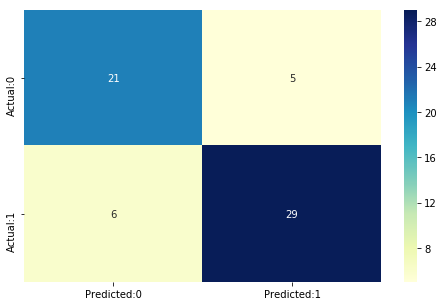

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt = 'd',cmap="YlGnBu")

Predicted probabilities of 0 (No Coronary Heart Disease) and 1 ( Coronary Heart Disease: Yes) for the test data with a default classification threshold of 0.5



# Second Model : Random Forest Classifier

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
y = heart_data['target'] 
exclude_col = ['target']

X = heart_data[[i for i in heart_data.columns.values.tolist() if i not in exclude_col]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [36]:
# Train: Random Forest
random_forest = RandomForestClassifier(n_estimators= 17, random_state = 0)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_train = round(random_forest.score(X_train, y_train) * 100, 2)
acc_val = round(random_forest.score(X_test, y_test) * 100, 2)

print("acc train: " + str(acc_train))
print("acc test: "+ str(acc_val))

acc train: 100.0
acc test: 81.97


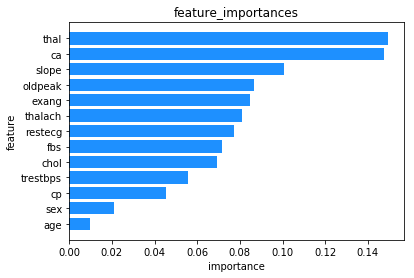

In [15]:
feature_importance = random_forest.feature_importances_
feat_importances = pd.Series(random_forest.feature_importances_, index= heart_data.columns[:-1])
feat_importances = feat_importances.nlargest(13)

feature = heart_data.columns.values.tolist()[0:-1]
importance = sorted(random_forest.feature_importances_.tolist())


x_pos = [i for i, _ in enumerate(feature)]

plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature)

plt.show()

# Third Model : Neural Networks

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [17]:
### importing pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
torch.manual_seed(42)

#hyperparameters
h1 = 4
h2 = 4
lr = 0.0001
num_epoch = 3300

#build the neural nets model
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, 2)
    

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        #return  F.log_softmax(x, dim=1)
        return x
    
    
net = Net()

#defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(net.parameters(), lr=lr, momentum=0.7)

loss_per_epoch = []

#train
for epoch in range(num_epoch):
    X = Variable(torch.Tensor(X_train.values).float())
    Y = Variable(torch.Tensor(y_train.values).long())

    #feedforward - backprop
    optimizer.zero_grad()
    
    out = net(X)
    loss = criterion(out, Y)
    loss.backward()
    optimizer.step()

    if (epoch) % 100 == 0:
        #get test accuracy
        X = Variable(torch.Tensor(X_test.values).float())
        Y = torch.Tensor(y_test.values).long()
        out = net(X)
        _, predicted = torch.max(out.data, 1)


        #get training accuracy 
        Xt = Variable(torch.Tensor(X_train.values).float())
        Yt = torch.Tensor(y_train.values).long()
        out = net(Xt)
        _, predicted_train = torch.max(out.data, 1)

        #print accuration
        testacc = (100 * torch.sum(Y==predicted) / len(y_test))
        trainacc = (100 * torch.sum(Yt==predicted_train) / len(y_train))
        print('Epoch: ',epoch,' Test Acc : ', testacc ,' Training Acc :' ,trainacc)
#         print ('Epoch [%d/%d] Loss: %.4f' 
#                    %(epoch+1, num_epoch, loss.data[0]))
    loss_per_epoch.append(loss.item()) 
        


Epoch:  0  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  100  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  200  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  300  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  400  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  500  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  600  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  700  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  800  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  900  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  1000  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  1100  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  1200  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  1300  Test Acc :  tensor(67)  Training Acc : tensor(63)
Epoch:  1400  Test Acc :  tensor(68)  Training Acc : tensor(66)
Epoch:  1500  Test Acc :  tensor(70)  Training Acc :

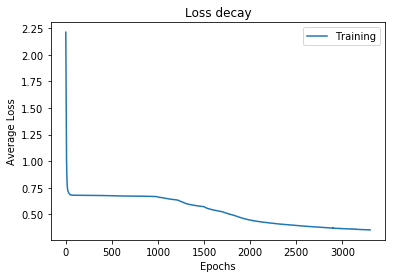

Accuracy of the Test 81 %
Accuracy of the Training 87 %


In [18]:
epochs = np.arange(1,num_epoch + 1)
plt.plot(epochs, loss_per_epoch, label='Training')
plt.ylabel('Average Loss')
plt.xlabel('Epochs')
plt.title('Loss decay')
plt.legend()
plt.show()       

xtest = X_test
ytest = y_test

#get prediction
X = Variable(torch.Tensor(xtest.values).float())
Y = torch.Tensor(ytest.values).long()
out = net(X)
_, predicted = torch.max(out.data, 1)


#get prediction train
Xt = Variable(torch.Tensor(X_train.values).float())
Yt = torch.Tensor(y_train.values).long()
out = net(Xt)
_, predicted_train = torch.max(out.data, 1)

#get accuration
print('Accuracy of the Test %d %%' % (100 * torch.sum(Y==predicted) / len(y_test)))
print('Accuracy of the Training %d %%' % (100 * torch.sum(Yt==predicted_train) / len(y_train)))

## That's it : Summary

With a data of only 303 rows we're more likely to overfit and not to generalize overall the real world situations but we're sure if we got larger dataset our models will be surely significant and can be trusted !